# DS102 Course Assignment

Name: Mulliana Yusuff
Class: DS102 Sunday 6.30pm

This project is a capstone project for the course DS102 Data Analysis with Python from [Hackwagon Academy](https://hackwagon.com/data-science-102/) 

In [131]:
#Load all the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Update the display to 1 decimal place
pd.options.display.float_format = '{:,.1f}'.format
%matplotlib inline

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Settings throughout the notebook
sns.set()
DIMS=(16, 6)

 **I. Problem Statement / Research Topic (2 Marks)**

This study aims to quantify the impact of global warming in Singapore in order to get a better picture on how global warming is affecting Singapore. Often we see statistics that [claims](https://www.nccs.gov.sg/climate-change-and-singapore/national-circumstances/impact-of-climate-change-on-singapore) that the impact of global warming is becoming more prevalent. But such statistic does not provide us with details such as how rapid the effects are taking. With the current measures taken to combat global warming, one would assume that the impact of gloabl warming would be reduce, but does it seem that way?

This study will be done using the surface air temperature and rainfall data obtained at https://data.gov.sg/

**II. Dataset Evaluation (2 Marks)**

The datsets used for this project are:

Surface Air Temperature - Monthly Mean: https://data.gov.sg/dataset/surface-air-temperature-monthly-mean

This dataset is the record of the temperature of Singapore, all the way from 1982

Rainfall - Monthly Total: https://data.gov.sg/dataset/rainfall-monthly-total

This dataset is the volume of rainfall in Singapore, all the way from 1982

_2018 data is remove as it is currently ongoing_

**Load/Clean the Datasets**

The data contains the various temperature for each month. To do the analysis easily, the data will be combine into years instead. Data that is from the same year will be added together and the average temperature of that category will be calculate.

In [163]:
df_temp_mean = pd.read_csv("surface-air-temperature-monthly-mean.csv")
df_temp_min = pd.read_csv("surface-air-temperature-monthly-absolute-extreme-minimum.csv")
df_temp_max = pd.read_csv("surface-air-temperature-monthly-absolute-extreme-maximum.csv")

print(df_temp_min.columns)
print(df_temp_max.columns)
print(df_temp_mean.columns)

Index(['month', 'temp_extremes_min'], dtype='object')
Index(['month', 'max_temperature'], dtype='object')
Index(['month', 'mean_temp'], dtype='object')


In [164]:
#Clean dataset such that the month and year are splitted
#Remove 2018 data as it is currently ongoing

def clean(df,quantity,month='month',year='year'):
    df_modified = df.copy()
    df_modified[year] = df_modified[month]
    df_modified = df_modified[[month,year,quantity]]
    df_modified[month] = df_modified[month].apply(lambda x: x.split("-")[1])
    df_modified[year] = df_modified[year].apply(lambda x: x.split("-")[0])
    df_modified[month] = pd.to_numeric(df_modified[month])
    df_modified[year] = pd.to_numeric(df_modified[year])
    df_modified = df_modified.groupby([year]).mean()
    df_modified = df_modified.drop([month], axis=1)
    df_modified = df_modified.reset_index()
    df_modified = df_modified.drop(df_modified.index[int(len(df_modified.index)) - 1]) # To remove the 2018 entry
    return df_modified

In [165]:
df_temp_mean_modified = clean(df_temp_mean,'mean_temp')
df_temp_mean_modified.tail()

,year,mean_temp
31,2013,27.7
32,2014,27.9
33,2015,28.2
34,2016,28.4
35,2017,27.7


In [166]:
df_temp_min_modified = clean(df_temp_min,'temp_extremes_min')
df_temp_min_modified.tail()

,year,temp_extremes_min
31,2013,22.2
32,2014,22.6
33,2015,23.2
34,2016,23.1
35,2017,22.9


In [167]:
df_temp_max_modified = clean(df_temp_max,'max_temperature')
df_temp_max_modified.tail()

,year,max_temperature
31,2013,33.6
32,2014,33.4
33,2015,33.6
34,2016,33.8
35,2017,33.2


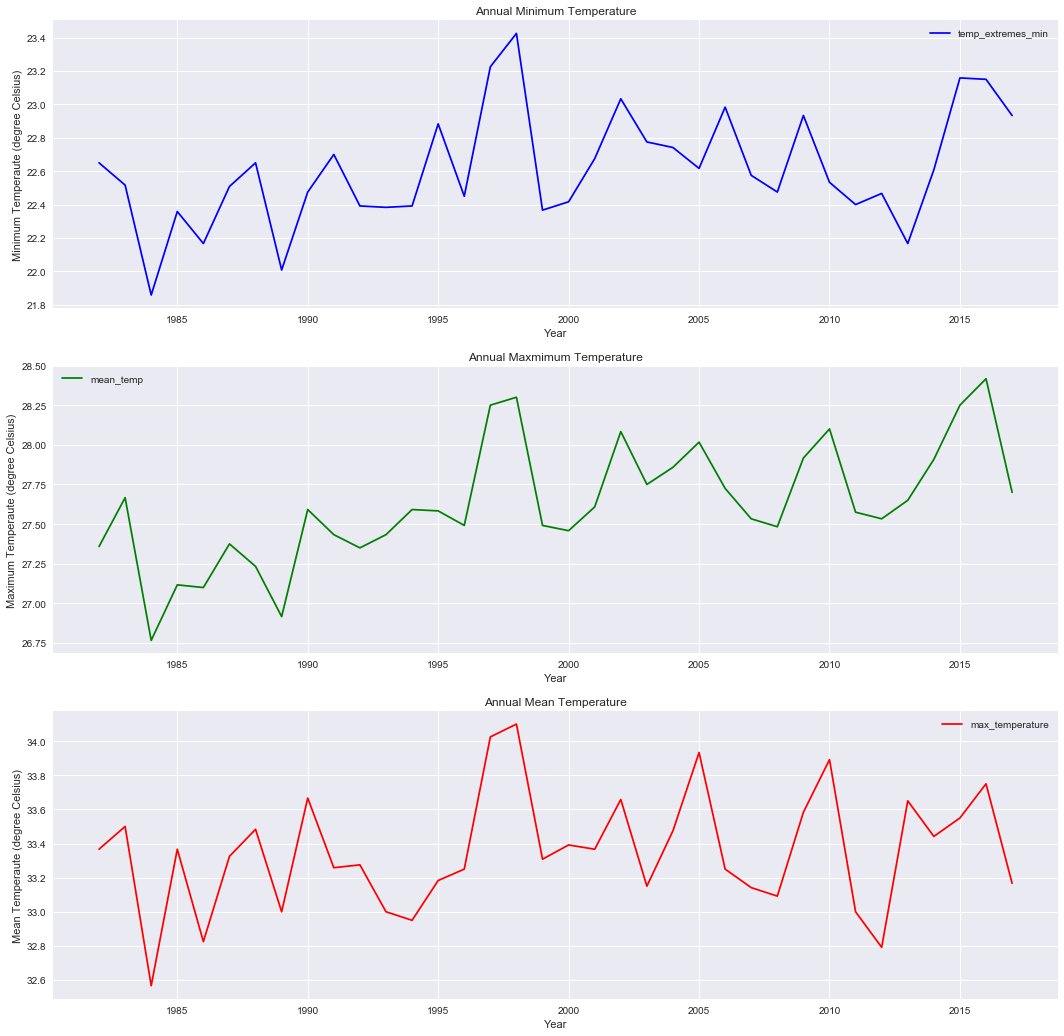

In [172]:
#Plotting graph of the original data

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
#fig.suptitle("Average tempreature annually, 1982 - 2018", fontsize=16)

df_temp_min_modified.plot(kind='line', x='year', y='temp_extremes_min', ax=ax1,color='blue')
df_temp_mean_modified.plot(kind='line', x='year', y='mean_temp', ax=ax2,color='green')
df_temp_max_modified.plot(kind='line', x='year', y='max_temperature', ax=ax3,color='red')

ax1.set_title("Annual Minimum Temperature")
ax1.set_ylabel("Minimum Temperaute (degree Celsius)")
ax1.set_xlabel("Year")

ax2.set_title("Annual Maxmimum Temperature")
ax2.set_ylabel("Maximum Temperaute (degree Celsius)")
ax2.set_xlabel("Year")

ax3.set_title("Annual Mean Temperature")
ax3.set_ylabel("Mean Temperaute (degree Celsius)")
ax3.set_xlabel("Year")

plt.show()

**III. Methodology (3 Marks)**

To determine the rate of increase in temperature for the the different category, our approach is to do a linear regression and find out the gradient of the line. Since the data is very irregular, a non-linear regression would not be suitable as it may overfit the data. Plus, it would be difficult to estimate the rate of change.

A function is created to calculate the linear regression for each temperature category. The regression value will then be plotted together with the actual data for visual comparision

In [174]:
def prediction(df,quantity,year='year'):
    X = df[[year]]
    y = df[quantity]
    # Create the Model
    model = sm.OLS(y,X)
    # Fit the dataset
    results = model.fit()
    # Print the summary results
    print(results.summary())
    print('Parameters: {} '.format(results.params))
    df['Linear Regression'] = model.fit().fittedvalues

#### Minimum Temperature

In [175]:
prediction(df_temp_min_modified,'temp_extremes_min')
print()
print(df_temp_min_modified.head())
print()
print(df_temp_min_modified.tail())

                            OLS Regression Results                            
Dep. Variable:      temp_extremes_min   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.861e+05
Date:                Sat, 06 Oct 2018   Prob (F-statistic):           8.40e-67
Time:                        22:56:48   Log-Likelihood:                -8.9276
No. Observations:                  36   AIC:                             19.86
Df Residuals:                      35   BIC:                             21.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0113   2.62e-05    431.446      0.0

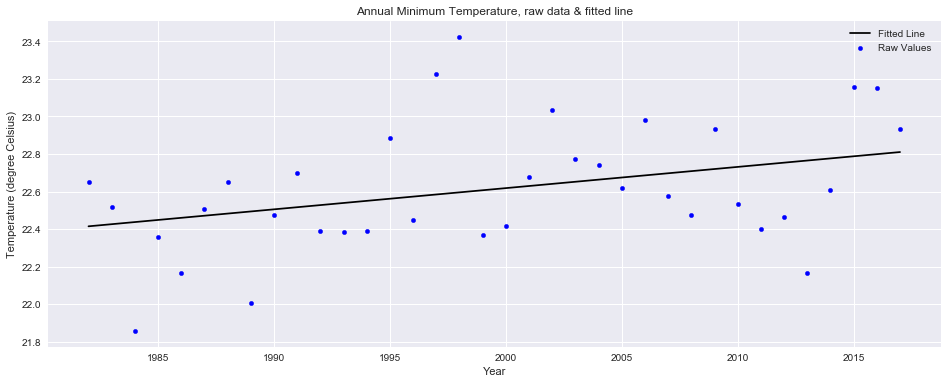

In [176]:
fig = plt.figure(figsize=DIMS)
ax1 = fig.add_subplot(111)
df_temp_min_modified.plot(kind='scatter', x='year', y='temp_extremes_min', ax=ax1,color='blue')
df_temp_min_modified.plot(kind='line', x='year', y='Linear Regression', ax=ax1,color='black')
plt.title("Annual Minimum Temperature, raw data & fitted line")
plt.xlabel("Year")
plt.ylabel("Temperature (degree Celsius)")
ax1.legend(['Fitted Line', 'Raw Values'])
plt.show()

#### Mean Temperature

In [177]:
prediction(df_temp_mean_modified,'mean_temp')
print()
print(df_temp_mean_modified.head())
print()
print(df_temp_mean_modified.tail())

                            OLS Regression Results                            
Dep. Variable:              mean_temp   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.896e+05
Date:                Sat, 06 Oct 2018   Prob (F-statistic):           3.67e-70
Time:                        22:57:02   Log-Likelihood:                -8.1820
No. Observations:                  36   AIC:                             18.36
Df Residuals:                      35   BIC:                             19.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0138   2.57e-05    538.186      0.0

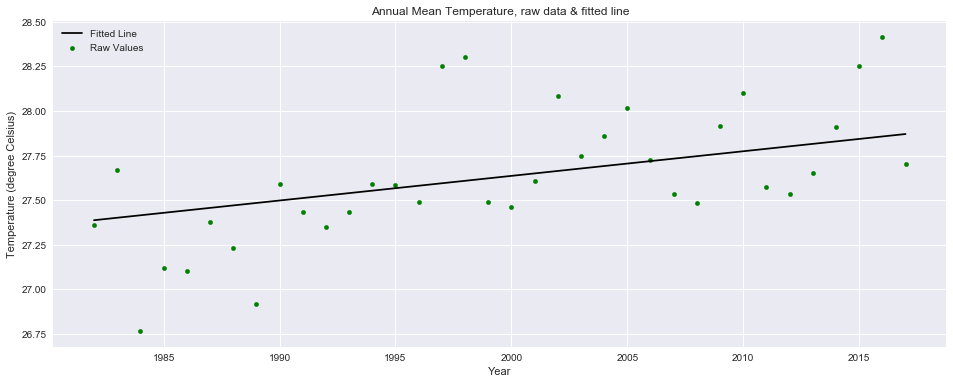

In [178]:
fig = plt.figure(figsize=DIMS)
ax1 = fig.add_subplot(111)
df_temp_mean_modified.plot(kind='scatter', x='year', y='mean_temp', ax=ax1,color='green')
df_temp_mean_modified.plot(kind='line', x='year', y='Linear Regression', ax=ax1,color='black')
plt.title("Annual Mean Temperature, raw data & fitted line")
plt.xlabel("Year")
plt.ylabel("Temperature (degree Celsius)")
ax1.legend(['Fitted Line', 'Raw Values'])
plt.show()

#### Max Temperature

In [179]:
prediction(df_temp_max_modified,'max_temperature')
print()
print(df_temp_max_modified.head())
print()
print(df_temp_max_modified.tail())

                            OLS Regression Results                            
Dep. Variable:        max_temperature   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.200e+05
Date:                Sat, 06 Oct 2018   Prob (F-statistic):           6.40e-71
Time:                        22:57:35   Log-Likelihood:                -13.165
No. Observations:                  36   AIC:                             28.33
Df Residuals:                      35   BIC:                             29.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0167   2.95e-05    565.716      0.0

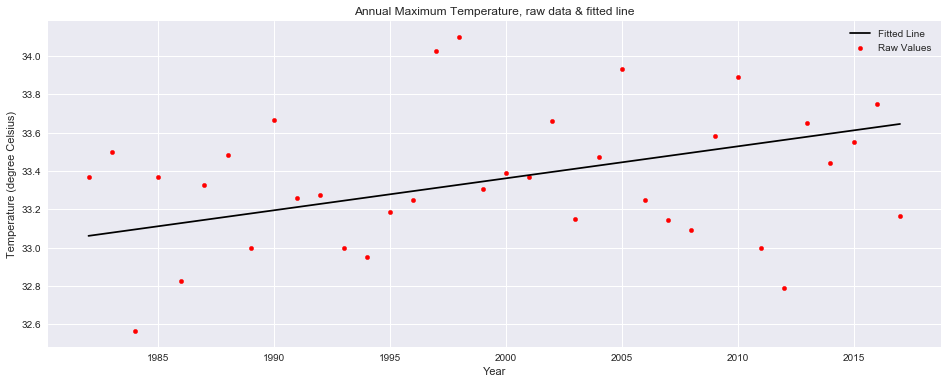

In [180]:
#Plotting graph

fig = plt.figure(figsize=DIMS)
ax1 = fig.add_subplot(111)
#fig.suptitle("Average tempreature annually, 1982 - 2018", fontsize=16)
df_temp_max_modified.plot(kind='scatter', x='year', y='max_temperature', ax=ax1,color='red')
df_temp_max_modified.plot(kind='line', x='year', y='Linear Regression', ax=ax1,color='black')
plt.title("Annual Maximum Temperature, raw data & fitted line")
plt.xlabel("Year")
plt.ylabel("Temperature (degree Celsius)")
ax1.legend(['Fitted Line', 'Raw Values'])
plt.show()

**IV. Insights / Evluation (3 marks)**

From the Linear Regression above: 

Rate of change for Minimum Temperature : **0.0113 degrees/year**

Rate of change for Mean Temperature : **0.0138 degrees/year**

Rate of change for Maximum Temperature : **0.0167 degrees/year**

Although this is an estimate, we can also deduce from the raw data that the temperature are overall incresasing. Other than measuring the rate of increase of temperature, one can also analysis the fluctuation of the temperature per year to see how much the fluctuation differs for every year. Another effect of global warming is the change in seasons.